<a href="https://colab.research.google.com/github/shaoern1/SITNVIDIA/blob/main/EDA_on_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import json
import pandas as pd

In [56]:
# Opening of json file + reading

jsonpath = "/content/combined_data.json"

with open(jsonpath, "r") as f:
  combined_data = json.load(f)

In [57]:
# Normalise json and print head
df = pd.json_normalize(combined_data, 'questions_and_answers', ['video_id','video_path', 'duration'])
print(df.head())

                                            question  \
0               How do the bulls fight in the video?   
1    Can you describe what's happening in the video?   
2         What are the two bulls doing in the video?   
3       Could you give a brief summary of the video?   
4  Can you describe the content of the video in d...   

                                              answer       video_id  \
0  In the video, the bulls are seen standing in t...  v_b0bM4vKxoXQ   
1  In the video, a large group of individuals are...  v_b0bM4vKxoXQ   
2  The two bulls standing in the pit lead to figh...  v_b0bM4vKxoXQ   
3  Sure, the video shows a large group of people ...  v_b0bM4vKxoXQ   
4  In the video, a large group of people is seen ...  v_b0bM4vKxoXQ   

                                          video_path duration  
0  /Users/shaoern/Desktop/SITNVIDIA/tar_train/tar...   129.85  
1  /Users/shaoern/Desktop/SITNVIDIA/tar_train/tar...   129.85  
2  /Users/shaoern/Desktop/SITNVIDIA/tar_trai

In [58]:
# Count the number of unique video IDs
num_unique_videos = df['video_id'].nunique()
print(f"Number of unique videos: {num_unique_videos}")

# Count the number of rows in the DataFrame
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")
# Check for any null columns
print(df.isnull().sum())

Number of unique videos: 410
Number of rows: 3096
question       0
answer         0
video_id       0
video_path     0
duration      28
dtype: int64


In [59]:


# Filter the DataFrame to show rows where 'duration' is null
null_duration_rows = df[df['duration'].isnull()]
num_rows = null_duration_rows.shape[0]
print(f"Number of rows: {num_rows}")
# Display the rows
print(null_duration_rows)


Number of rows: 28
                                               question  \
65     What is the man's movement pattern in the video?   
66        What is the main event captured in the video?   
67          Can you describe what happens in the video?   
68        Can you describe the video content in detail?   
69      Could you provide a brief summary of the video?   
70               Can you describe the man in the video?   
71                      What is happening in the video?   
957   Can you describe the content of the video in d...   
958                   What is the purpose of the video?   
959                  What does the man do in the video?   
960                 What is the man doing in the video?   
961   Can you describe how the man is doing the crun...   
962        Could you give a brief summary of the video?   
963      Can you describe the main events of the video?   
1256      Can you describe the video content in detail?   
1257                    What is happe

In [60]:
# Rows without durations shows that they contain video files with broken .mp4 (will research more)
# For now I will drop the columns (28, should be 3068 left)
df = df.dropna()

# Count the number of rows in the DataFrame
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 3068


In [61]:
# Created group df by video_id

# Group by video_id and aggregate questions and answers
grouped_df = df.groupby('video_id').agg({
    'question': lambda x: list(x),
    'answer': lambda x: list(x),
    'video_path': 'first',
    'duration': 'first'
}).reset_index()
print("Grouped DataFrame:")
print(grouped_df.head())



Grouped DataFrame:
        video_id                                           question  \
0  v_-9B2XtqICFw  [What are the main events in the video?, Can y...   
1  v_-PbWrGLuHT8  [Can you describe the different locations feat...   
2  v_-fjUWhSM6Hc  [What are the main events that take place in t...   
3  v_-lER_VO9LUo  [Could you describe the video in detail?, Can ...   
4  v_-oJb3Acw-_s  [What is happening in the video?, Could you br...   

                                              answer  \
0  [The video features various sports such as ten...   
1  [The video showcases windsurfing adventures on...   
2  [The main events in the video are javelin thro...   
3  [Sure, the video shows two dogs walking on a s...   
4  [In the video, a man is being tattooed by a wo...   

                                          video_path duration  
0  /Users/shaoern/Desktop/SITNVIDIA/tar_train/tar...   183.97  
1  /Users/shaoern/Desktop/SITNVIDIA/tar_train/tar...    53.03  
2  /Users/shaoern/Desktop

In [62]:
# Check for duplicates in the grouped DataFrame
duplicate_video_ids = grouped_df[grouped_df.duplicated(subset='video_id', keep=False)]
num_duplicates = duplicate_video_ids['video_id'].nunique()
print(f"Number of duplicate video IDs after grouping: {num_duplicates}")
if not duplicate_video_ids.empty:
    print("Duplicate video ID rows after grouping:")
    print(duplicate_video_ids)

Number of duplicate video IDs after grouping: 0


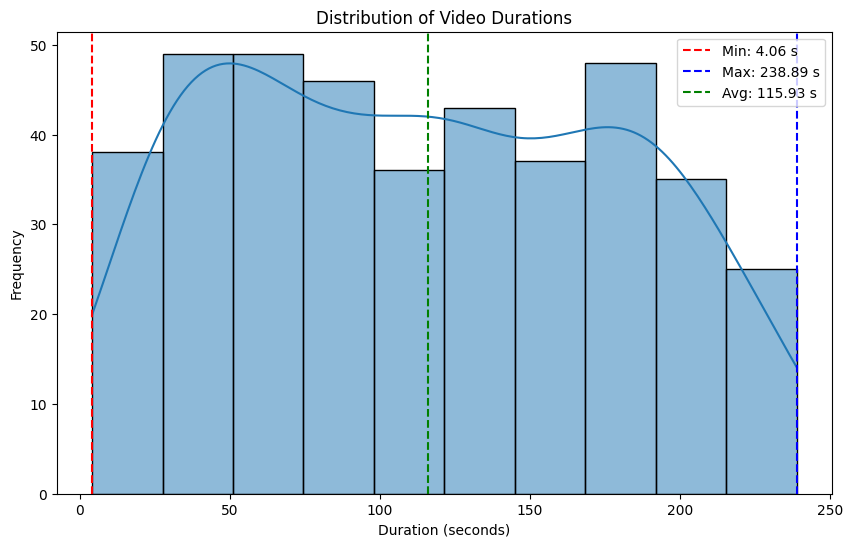

Number of unique videos: 406


In [64]:
# Plot the distribution of video durations
plt.figure(figsize=(10, 6))
sns.histplot(grouped_df['duration'], kde=True)

# Add lines for min, max, and average durations
plt.axvline(min_duration, color='red', linestyle='--', label=f'Min: {min_duration:.2f} s')
plt.axvline(max_duration, color='blue', linestyle='--', label=f'Max: {max_duration:.2f} s')
plt.axvline(avg_duration, color='green', linestyle='--', label=f'Avg: {avg_duration:.2f} s')

# Add title and labels
plt.title('Distribution of Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show plot
plt.show()

num_unique_videos = grouped_df['video_id'].nunique()
print(f"Number of unique videos: {num_unique_videos}")

count    406.000000
mean       7.556650
std        1.916914
min        6.000000
25%        7.000000
50%        7.000000
75%        7.000000
max       17.000000
Name: question, dtype: float64


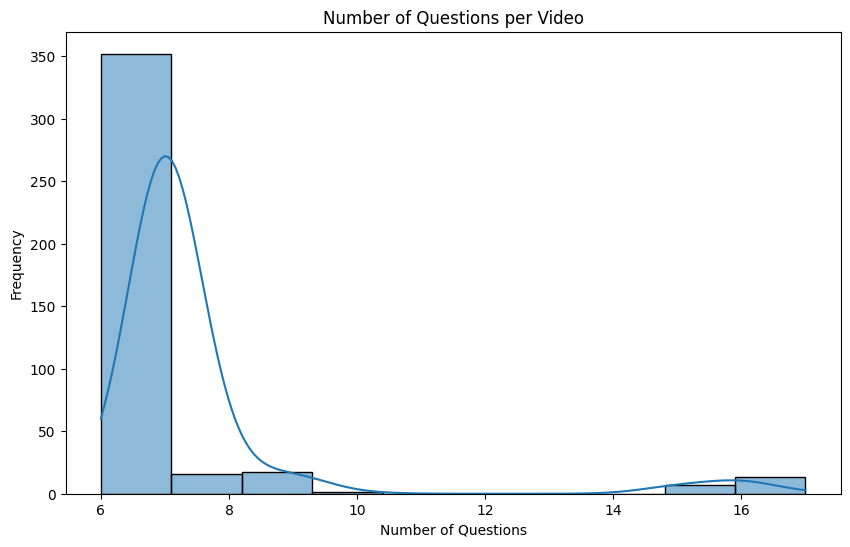

In [66]:
# number of questions & answers per question
questions_per_video = grouped_df['question'].apply(len)
print(questions_per_video.describe())

# Plot the number of questions per video
plt.figure(figsize=(10, 6))
sns.histplot(questions_per_video, kde=True)
plt.title('Number of Questions per Video')
plt.xlabel('Number of Questions')
plt.ylabel('Frequency')
plt.show()


In [69]:
# Calculate the number of questions for each video
grouped_df['num_questions'] = grouped_df['question'].apply(len)

# Identify the video ID with the maximum number of questions
max_questions_video = grouped_df.loc[grouped_df['num_questions'].idxmax()]
print(f"Video ID with the maximum number of questions: {max_questions_video['video_id']}")
print(f"Number of questions: {max_questions_video['num_questions']}")
print(f"Questions: {max_questions_video['question']}")

# Its is true that this video has 17 Q&A

Video ID with the maximum number of questions: v_gGYje5UGLdY
Number of questions: 17
Questions: ['What is the person wearing?', 'Could you summarize the main events in the video?', 'What is happening in the video?', 'What does the video show?', 'How does the person play the drums in the video?', 'What is the person in the video doing?', 'In what direction is the person facing while playing the drums in the video?', 'Can you describe the video in detail?', "Can you describe what's happening in the video?", 'Can you write a short poem inspired by the video?', 'Can you describe the video content in detail?', 'Can you describe the energy and passion of the performer in the video?', 'What is the overall impression of the video?', 'Can you describe in detail the content of the video?', 'Can you write a short poem inspired by the video?', 'What is the person wearing in the video and how is he positioned?', 'What is the video about?']
